In [1]:
import numpy as np
import mechs
import players
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import inequality
import utilities
from sklearn.preprocessing import normalize
from tabulate import tabulate
from random import uniform
from scipy import stats
import experiments
np.set_printoptions(suppress=True)
from functools import reduce
import pickle

In [3]:
#n = number of agents, g = number of goods, beta param parameterizes the utility coefficients
n = 20
g = 10
beta_param=2.# if agents are independent, their preferences are drawn from a beta(beta_param, 1)
n_trials = 20 
alphamax = 0.10 #should be on the order of 1 / (n-1)
sv = True #set to false if you do not want to save the figures

In [ ]:
#runs the set of experiments testing the effect of alpha_i on different metrics
mus = np.geomspace(0.01,alphamax, num=12)#np.arange(0.0, 1.01, 0.1)
alpha_exp = []
for i in range(n_trials):
    init_u = list(np.random.beta(beta_param, 1., (n,g)))
    alpha_exp.append(experiments.effect_alpha(init_u, n, g, mus))


    
# runs experiments testing the effect of the proportion of inequality-averse agents
prop_averse_alphas = np.geomspace(0.01, alphamax, num=5)
prop_averse_exp = {alp: [] for alp in prop_averse_alphas}
for al in prop_averse_alphas:
    for i in range(n_trials):
        init_u = list(np.random.beta(beta_param, 1., (n,g)))
        prop_averse_exp[al].append(experiments.effect_prop_averse(init_u, n,g, al))


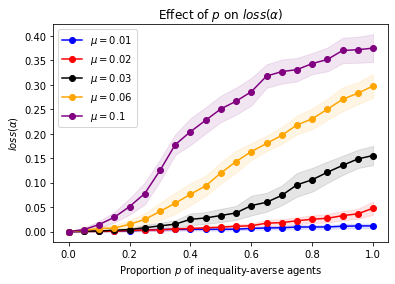

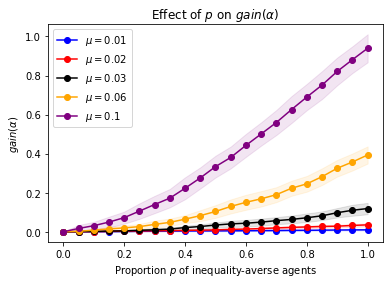

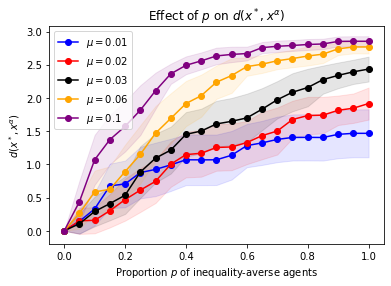

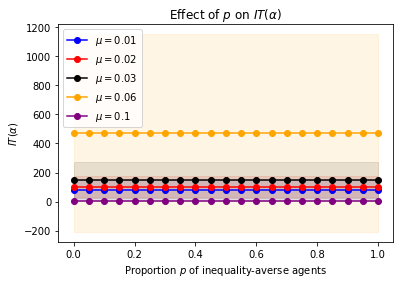

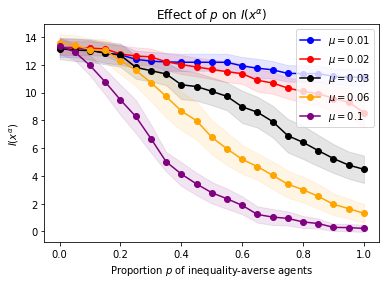

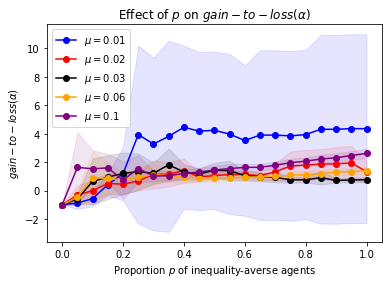

In [6]:
# generates plots for the experiments testing the effect of alpha_i on different metrics
utilities.plot_alpha_exp(alpha_exp, 'loss', n_trials, '$loss(\\alpha)$', alphamax, save=sv)
utilities.plot_alpha_exp(alpha_exp, 'gain', n_trials, '$gain(\\alpha)$', alphamax,save=sv)
utilities.plot_alpha_exp(alpha_exp, 'distance', n_trials, '$d(x^*, x^\\alpha)$', alphamax,save=sv)
utilities.plot_alpha_exp(alpha_exp, 'usw max util loss', n_trials, '$IT(\\alpha)$', alphamax,save=sv)
utilities.plot_alpha_exp(alpha_exp, 'usw xalpha FS inequality', n_trials, '$I(x^\\alpha)$', alphamax,save=sv)
utilities.plot_alpha_exp(alpha_exp, 'gain to loss', n_trials, '$gain-to-loss(\\alpha)$', alphamax,save=sv)
#generates the plots for experiments testing the effect of the proportion of inequality-averse agents
utilities.plot_propaverse(prop_averse_exp,'loss', n_trials, '$loss(\\alpha)$', alphamax, save=sv)
utilities.plot_propaverse(prop_averse_exp,'gain', n_trials, '$gain(\\alpha)$', alphamax, save=sv)
utilities.plot_propaverse(prop_averse_exp,'distance', n_trials, '$d(x^*, x^\\alpha)$', alphamax, save=sv)
utilities.plot_propaverse(prop_averse_exp,'usw max util loss', n_trials, '$IT(\\alpha)$', alphamax, save=sv)
utilities.plot_propaverse(prop_averse_exp,'usw xalpha FS inequality', n_trials, '$I(x^\\alpha)$',alphamax, loc='upper right', save=sv)
utilities.plot_propaverse(prop_averse_exp,'gain to loss', n_trials, '$gain-to-loss(\\alpha)$', alphamax, save=sv)

In [7]:
#saves the set of experiments run in the previous cell 
#with open('pickles/synthetic/alpha_trial_exps_n20_g10_alphamax05.pickle', 'wb') as handle:
#    pickle.dump(alpha_exp, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/synthetic/prop_averse_exp_n20_g10_alphamax05.pickle', 'wb') as handle:
#    pickle.dump(prop_averse_exp, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
#opens previous experiments
with open('pickles/synthetic/alpha_trial_exps_n20_g10alphamax05.pickle', 'rb') as handle:
    alpha_exp = pickle.load(handle)
    
with open('pickles/synthetic/prop_averse_exp_n20_g10_alphamax05.pickle', 'rb') as handle:
    prop_averse_exp = pickle.load(handle)